# M.2.X. Inflation

### DRW / UChicago Prep Course

#### Chicago, Summer 2025

Questions?
* Contact: Mark Hendricks
* hendricks@uchicago.edu

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
    
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13
from matplotlib.ticker import StrMethodFormatter

In [2]:
rawdata = pd.read_excel('../data/economic_data.xlsx',sheet_name='data').set_index('date')

FREQ = 4

if FREQ == 4:
    FREQcode = 'Q'
elif FREQ == 1:
    FREQcode = 'Y'
elif FREQ==12:
    FREQcode = 'M'

data = rawdata.resample(FREQcode).agg('last')
data.index = data.index - pd.tseries.offsets.BDay(1)

data_econ = data

# Economic Aggregates

### The dual mandate
The Fed has a dual mandate
- price stability
- full employment

There is a lot of controversey around how the Fed should specifically measure and prioritize these dual goals.

- Traditionally, a view that economic growth and output are related.
- Accordingly, tension in keeping inflation low while also stimulating the economy.

In particular, there is controversey about
- How forcefully should the Fed act with monetary policy to reduce and control inflation? 
- Their primary tool is to raise interest rates.
- Should they risk recession to control inflation?

### The data

The plots below give context about the economy, especially measured discussed relative to interest rates and the Fed.

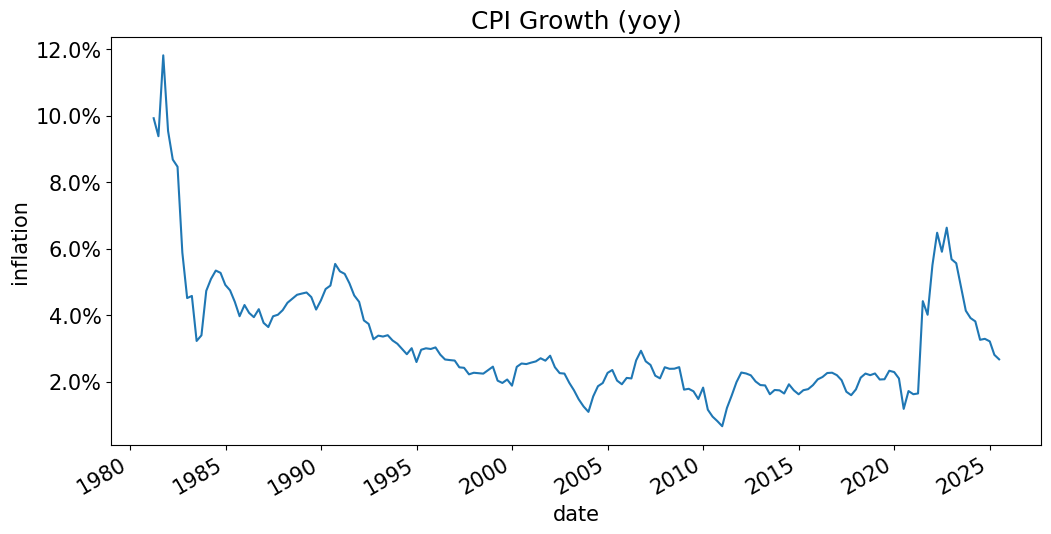

In [3]:
inflation = (data['CPI-Core']/data['CPI-Core'].shift(1) -1 ) * FREQ

inflation_yoy = (data['CPI-Core']/data['CPI-Core'].shift(FREQ) -1 )
ax = inflation_yoy.plot(title='CPI Growth (yoy)',ylabel='inflation')
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.1%}'))
plt.show()

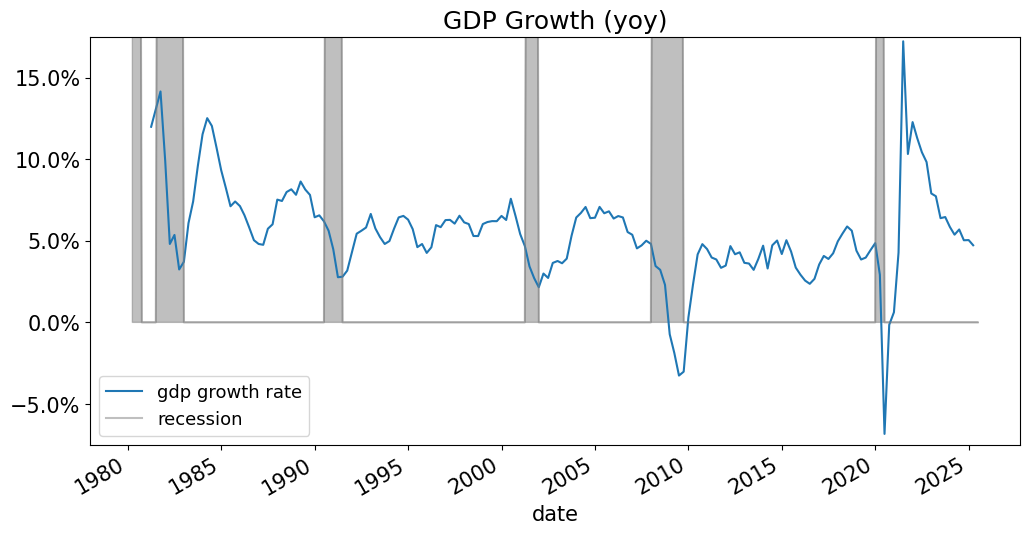

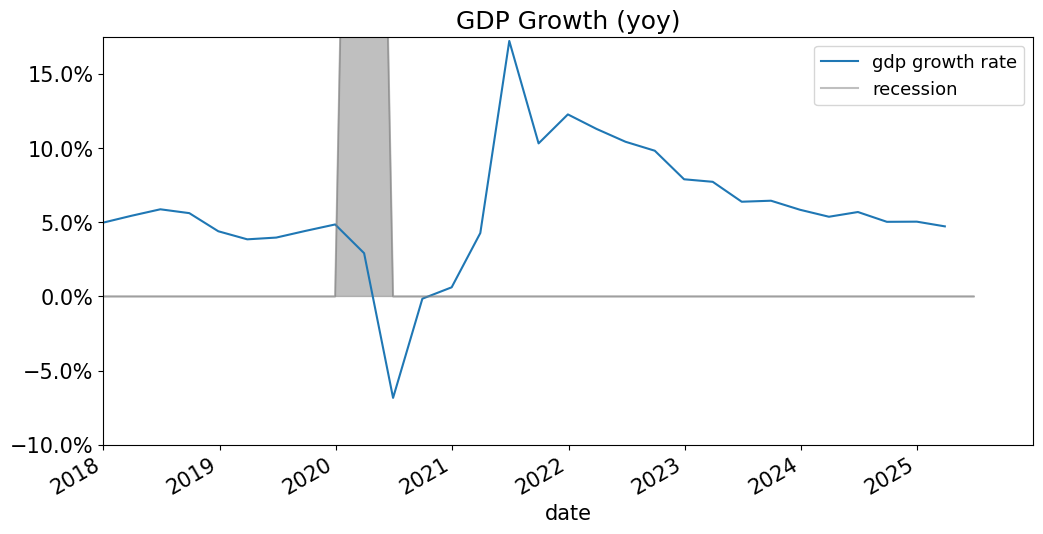

In [4]:
gdp_growth_yoy = (data['GDP'] / data['GDP'].shift(FREQ) - 1)
ax = gdp_growth_yoy.plot()
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.1%}'))
data['Recession'].plot.area(ax=ax, alpha=0.5,color='gray')

plt.title('GDP Growth (yoy)')
plt.ylim(-.075,.175)
plt.legend(['gdp growth rate','recession'])
plt.show()

ax = gdp_growth_yoy.plot(title='GDP Growth (yoy)',xlim=('2018-01-01','2025-12-31'))
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.1%}'))
data['Recession'].plot.area(ax=ax, alpha=0.5,color='gray')
plt.ylim(-.10,.175)
plt.legend(['gdp growth rate','recession'])
plt.show()

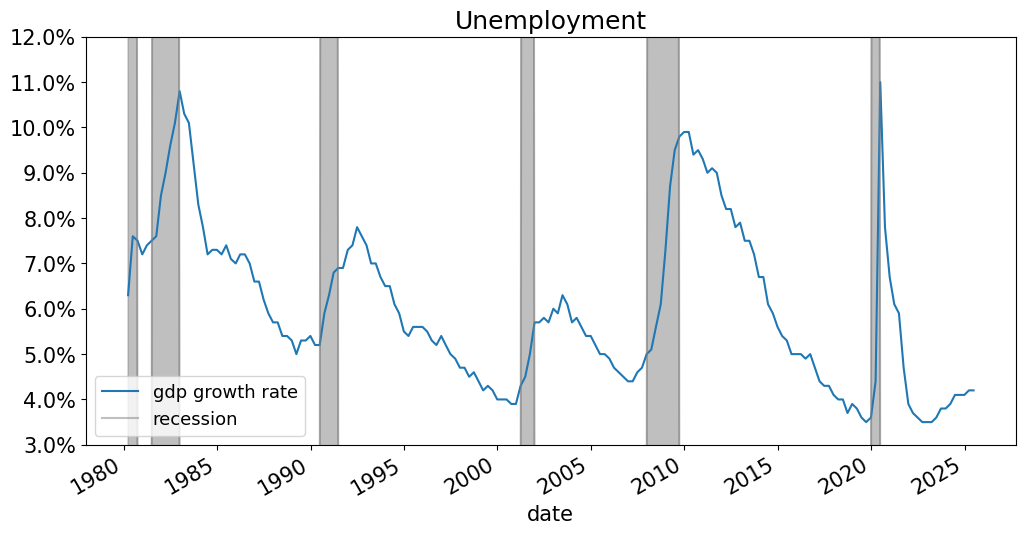

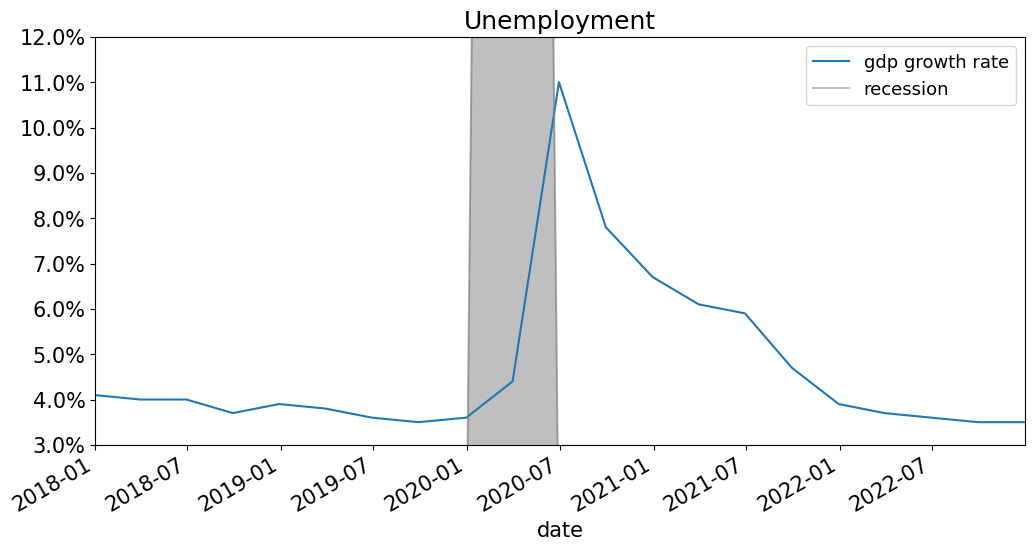

In [5]:
ax = (data['Unemployment']/100).plot()
data['Recession'].plot.area(ax=ax, alpha=0.5,color='gray')
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.1%}'))

plt.title('Unemployment')
plt.ylim(.03,.12)
plt.legend(['gdp growth rate','recession'])
plt.show()


ax = (data['Unemployment']/100).plot()
data['Recession'].plot.area(ax=ax, alpha=0.5,color='gray')
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.1%}'))

plt.title('Unemployment')
plt.xlim('2018-01-01','2022-12-31')
plt.ylim(.03,.12)
plt.legend(['gdp growth rate','recession'])
plt.show()

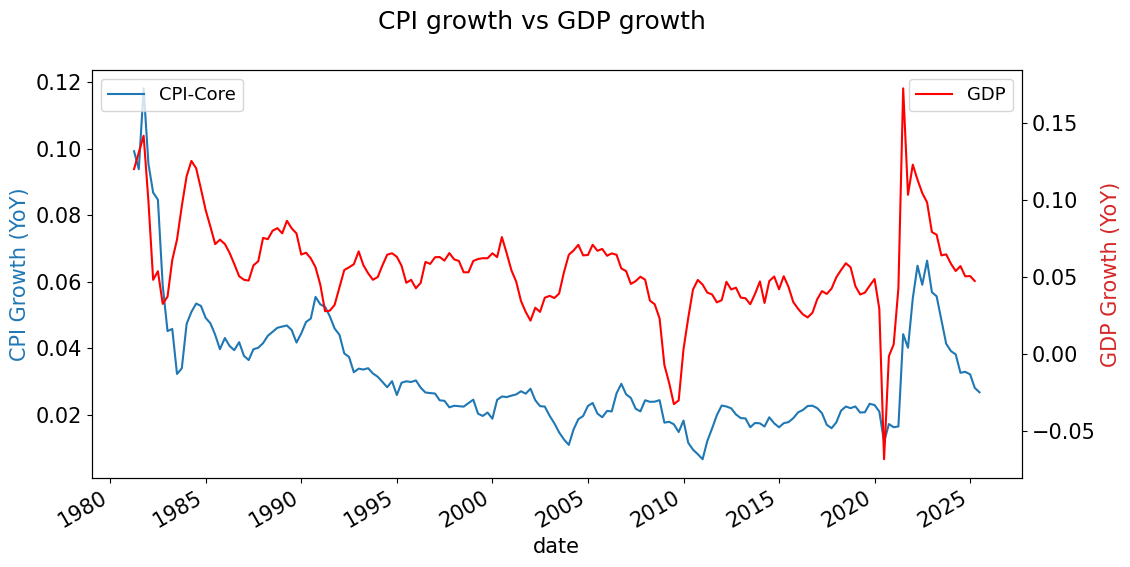

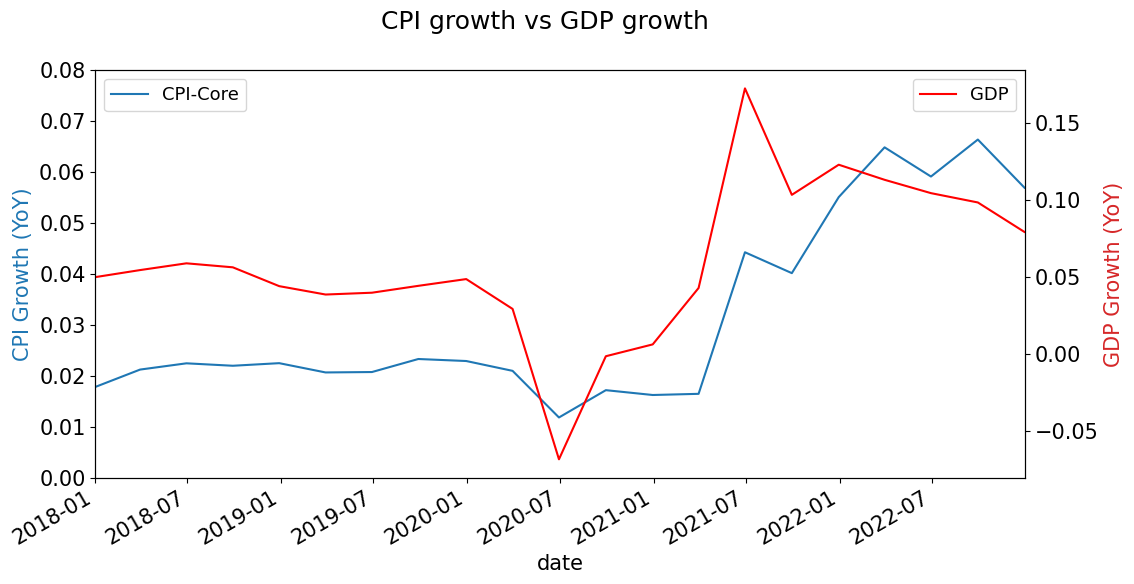

In [6]:
fig,ax = plt.subplots()
inflation_yoy.plot(ax=ax)
ax.legend(loc='upper left')
ax.set_ylabel('CPI Growth (YoY)', color='tab:blue')

ax2 = ax.twinx()
gdp_growth_yoy.plot(ax=ax2,color='red')
ax2.set_ylabel('GDP Growth (YoY)', color='tab:red')
ax2.legend()
fig.suptitle('CPI growth vs GDP growth')
plt.show()



fig,ax = plt.subplots()
inflation_yoy.plot(ax=ax,ylim=(0,.08))
ax.set_ylabel('CPI Growth (YoY)', color='tab:blue')
ax.legend(loc='upper left')

ax2 = ax.twinx()
gdp_growth_yoy.plot(ax=ax2,color='red',xlim=('2018-01-01','2022-12-31'))
ax2.set_ylabel('GDP Growth (YoY)', color='tab:red')
ax2.legend()
fig.suptitle('CPI growth vs GDP growth')
plt.show()

***

# Inflation

Several theories about the determinants of inflation.

- Monetary theory: Money supply (particularly as measured by "M2" money).
- Fiscal theory: Government spending, deficits, debt

Below are a few plots giving context.

### Monetary Theory

Historically, there is a strong correlation between money growth and inflation (with a lag.)

Milton Friedman famously believed that

*Inflation is always and everhwere a monetary phenomenon.*

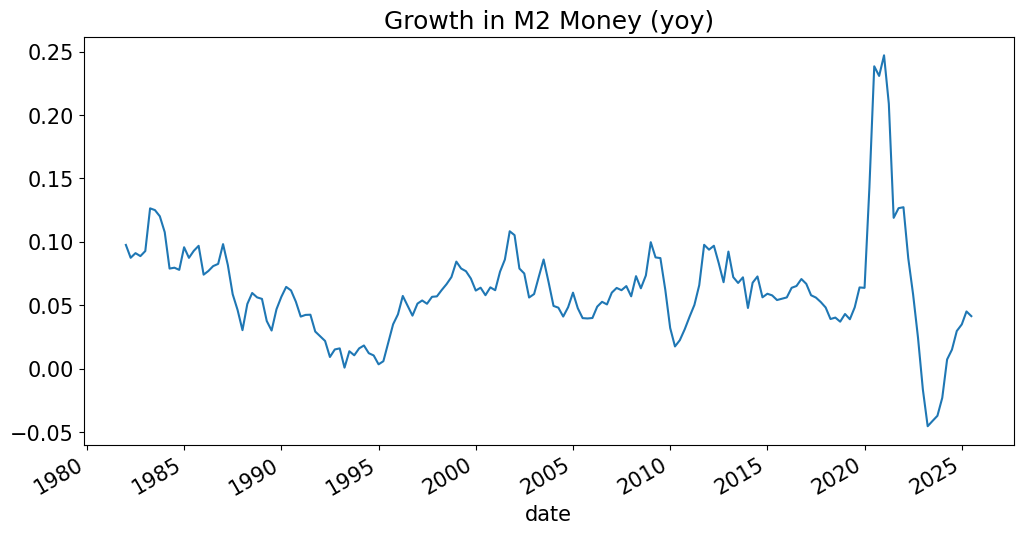

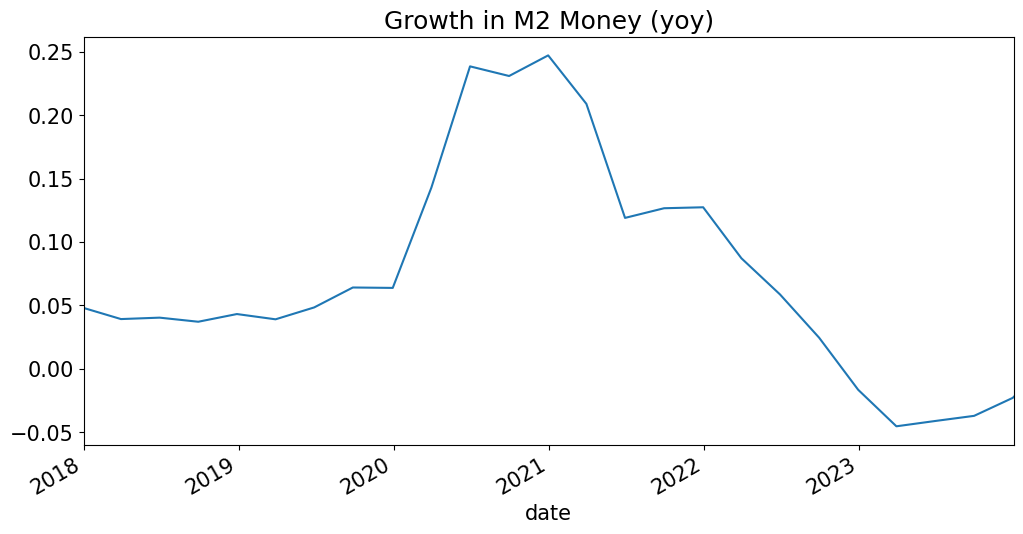

In [7]:
money_growth_yoy = (data['M2 Money']/data['M2 Money'].shift(FREQ)-1)
money_growth_yoy.plot(title='Growth in M2 Money (yoy)')
plt.show()

money_growth_yoy.plot(title='Growth in M2 Money (yoy)',xlim=('2018-01-01','2023-12-31'))
plt.show()

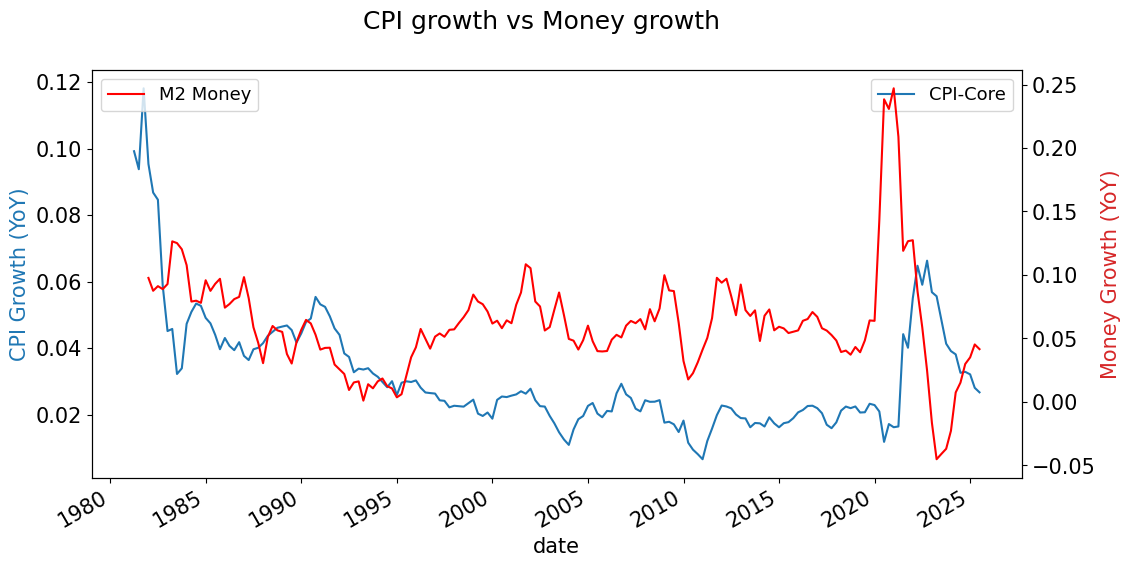

In [8]:
fig,ax = plt.subplots()
inflation_yoy.plot(ax=ax)
ax.set_ylabel('CPI Growth (YoY)', color='tab:blue')
ax.legend()

ax2 = ax.twinx()
money_growth_yoy.plot(ax=ax2,color='red')
ax2.set_ylabel('Money Growth (YoY)', color='tab:red')
ax2.legend()
fig.suptitle('CPI growth vs Money growth')
plt.show()

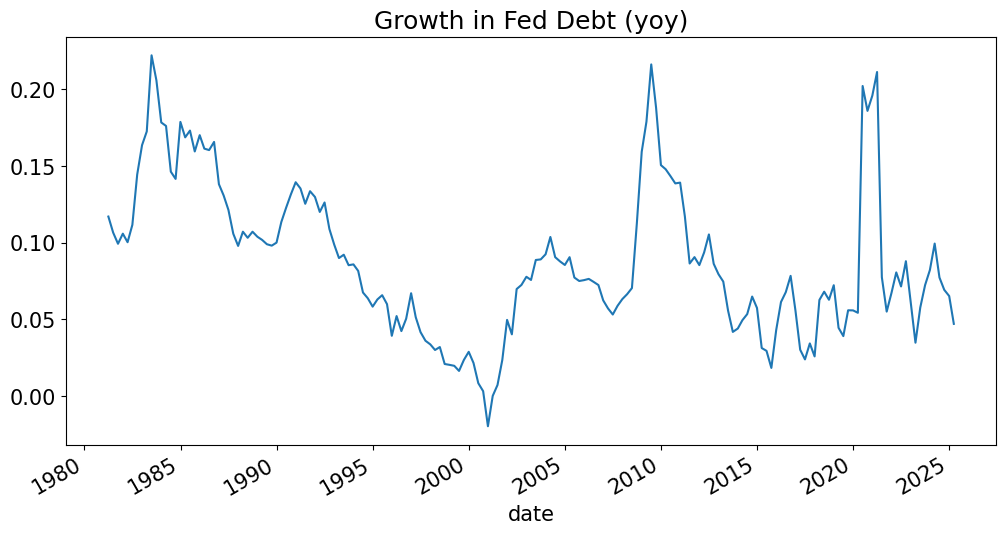

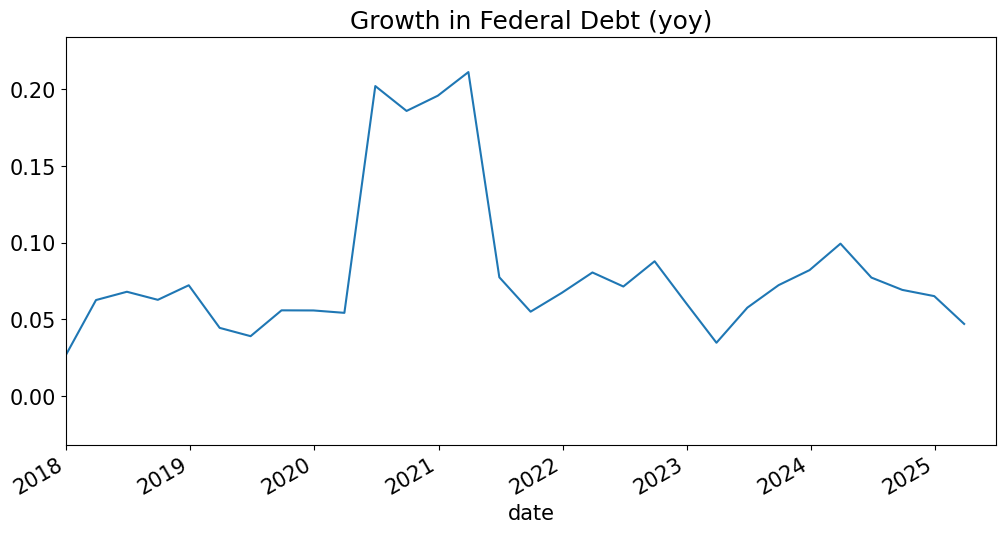

In [9]:
debt_growth_yoy = (data['Federal Public Debt']/data['Federal Public Debt'].shift(FREQ)-1)
debt_growth_yoy.plot(title='Growth in Fed Debt (yoy)')
plt.show()

debt_growth_yoy.plot(title='Growth in Federal Debt (yoy)',xlim=('2018-01-01','2025-06-30'))
plt.show()

***